# TicketFlipping

ticketmaster api login: JM091794%jm

#### ticketmaster api : JsIFIEjDAeLGxFsLboyREUYSTewcHBxt

In [27]:
import requests
import pandas as pd
from datetime import datetime
import json
import calendar


#### API key

In [28]:
url = "https://app.ticketmaster.com/discovery/v2/events.json"
api_key = "OG2ZdruFvuN85amv2T68Vt8AYWAaAgS3"

educate.io

# Monthly event generator
###### By using the monthly event generator, by setting the paramaters to the desired month, you can retrieve a data frame containg information on all the events listed in ticketmaster for that month

In [72]:
#creates df for all upcoming events in june
params = {
    "apikey": api_key,
    "countryCode": "US",
    "startDateTime": "2023-06-01T00:00:00Z",
    "endDateTime": "2023-06-30T23:59:59Z",
    "size": 10,
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    events = data["_embedded"]["events"]
    events_list = []
    for event in events:
        name = event["name"]
        location = event["_embedded"]["venues"][0]["name"]
        city = event["_embedded"]["venues"][0]["city"]["name"]
        face_value = event["priceRanges"][0]["min"] if "priceRanges" in event else None
        date_time = event["dates"]["start"]["dateTime"]
        date = datetime.strptime(date_time, "%Y-%m-%dT%H:%M:%SZ").date()
        if "priceRanges" in event:
            price_ranges = event["priceRanges"]
            lowest_price = price_ranges[0]["min"] if price_ranges else None
            highest_price = price_ranges[0]["max"] if price_ranges else None
        else:
            lowest_price = None
            highest_price = None
        day_of_week = date.strftime("%A")
        events_list.append({"Event Name": name, "Venue": location, "City": city, "Date": date, "Low ticket price": lowest_price, "High ticket price": highest_price, "DotW": day_of_week, "face value": face_value})
    June23df = pd.DataFrame(events_list, columns=["Event Name", "Date", "DotW", "Low ticket price", "High ticket price", "face value", "City", "Venue"])
    June23df = June23df.sort_values('Date', ascending=False)
else:
    print("Failed to retrieve events")
    
pass
June23df


,Event Name,Date,DotW,Low ticket price,High ticket price,face value,City,Venue
2,Shania Twain: Queen Of Me Tour,2023-06-30,Friday,60.95,260.95,60.95,Cuyahoga Falls,Blossom Music Center
1,Shania Twain: Queen Of Me Tour,2023-06-28,Wednesday,60.95,260.95,60.95,Charlotte,PNC Music Pavilion
4,Shania Twain: Queen Of Me Tour,2023-06-27,Tuesday,76.00,276.00,76.00,Columbia,Merriweather Post Pavilion
5,Shania Twain: Queen Of Me Tour,2023-06-09,Friday,40.95,225.95,40.95,Camden,Freedom Mortgage Pavilion
0,Shania Twain: Queen Of Me Tour,2023-06-07,Wednesday,61.95,246.95,61.95,Nashville,GEODIS Park
3,Shania Twain: Queen Of Me Tour,2023-06-05,Monday,60.95,240.95,60.95,Maryland Heights,"Hollywood Casino Amphitheatre - St. Louis, MO"
6,Shania Twain: Queen Of Me Tour,2023-06-04,Sunday,46.95,241.95,46.95,Tulsa,BOK Center
7,Los Angeles Dodgers vs. New York Yankees,2023-06-03,Saturday,NaN,NaN,NaN,Los Angeles,Dodger Stadium
8,Los Angeles Dodgers vs. New York Yankees,2023-06-03,Saturday,NaN,NaN,NaN,Los Angeles,Dodger Stadium
9,Shania Twain: Queen Of Me Tour,2023-06-01,Thursday,60.95,225.95,60.95,Palm Desert,Acrisure Arena at Greater Palm Springs


# User Input
#### The final tool asked user to input the year and month they would like to scrape events for

In [21]:
while True:
    try:
        year = int(input("Enter Year (YYYY): "))
        month = int(input("Enter Month (MM): "))
        if 1 <= month <= 12:
            break
        else:
            print("Invalid month. Please enter a value between 1 and 12.")
    except ValueError:
        print("Invalid year or month. Please enter integers.")

# get start and end dates for the month
last_day = calendar.monthrange(year, month)[1]
start_date = f"{year}-{month:02d}-01T00:00:00Z"
end_date = f"{year}-{month:02d}-{last_day:02d}T23:59:59Z"

# query Ticketmaster API
params = {
    "apikey": api_key,
    "countryCode": "US",
    "startDateTime": start_date,
    "endDateTime": end_date,
    "size": 200,
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    events = data["_embedded"]["events"]
    events_list = []
    for event in events:
        name = event["name"]
        location = event["_embedded"]["venues"][0]["name"]
        city = event["_embedded"]["venues"][0]["city"]["name"]
        face_value = event["priceRanges"][0]["min"] if "priceRanges" in event else None
        date_time = event["dates"]["start"]["dateTime"]
        date = datetime.strptime(date_time, "%Y-%m-%dT%H:%M:%SZ").date()
        if "priceRanges" in event:
            price_ranges = event["priceRanges"]
            lowest_price = price_ranges[0]["min"] if price_ranges else None
            highest_price = price_ranges[0]["max"] if price_ranges else None
        else:
            lowest_price = None
            highest_price = None
        day_of_week = date.strftime("%A")
        events_list.append({"Event Name": name, "Venue": location, "City": city, "Date": date, "Low ticket price": lowest_price, "High ticket price": highest_price, "DotW": day_of_week, "face value": face_value})
    Userdf = pd.DataFrame(events_list, columns=["Event Name", "Date", "DotW", "Low ticket price", "High ticket price", "face value", "City", "Venue"])
    Userdf = Userdf.sort_values('Date', ascending=False)
else:
    print("Failed to retrieve events")
    
pass
Userdf

    
      

Enter Year (YYYY): 2023
Enter Month (MM): 6


,Event Name,Date,DotW,Low ticket price,High ticket price,face value,City,Venue
2,Shania Twain: Queen Of Me Tour,2023-06-30,Friday,60.95,260.95,60.95,Cuyahoga Falls,Blossom Music Center
197,Morgan Wallen: One Night At A Time World Tour,2023-06-30,Friday,69.75,349.75,69.75,Detroit,Ford Field
117,Hamilton (NY),2023-06-30,Friday,109.00,249.00,109.00,New York,Richard Rodgers Theatre
45,Colorado Rockies vs. Los Angeles Dodgers,2023-06-30,Friday,12.00,300.00,12.00,Denver,Coors Field
183,Lady A,2023-06-30,Friday,NaN,NaN,NaN,Fort Myers,Barbara B. Mann Performing Arts Hall
...,...,...,...,...,...,...,...,...
73,Hamilton (NY),2023-06-01,Thursday,109.00,249.00,109.00,New York,Richard Rodgers Theatre
193,Morgan Wallen: One Night At A Time World Tour,2023-06-01,Thursday,74.75,354.75,74.75,Atlanta,Truist Park
78,Hamilton (NY),2023-06-01,Thursday,99.00,229.00,99.00,New York,Richard Rodgers Theatre
171,Hamilton,2023-06-01,Thursday,NaN,NaN,NaN,Oklahoma City,Civic Center Music Hall


## Keyword searches

In [30]:
### prompt for keyword
while True:
    keyword = input("Enter keyword: ")
    if keyword:
        break
    else:
        print("Invalid keyword. Please enter a value.")

# prompt for year and month
while True:
    try:
        year = int(input("Enter Year (YYYY): "))
        month = int(input("Enter Month (MM): "))
        if 1 <= month <= 12:
            break
        else:
            print("Invalid month. Please enter a value between 1 and 12.")
    except ValueError:
        print("Invalid year or month. Please enter integers.")

# get start and end dates for the month
last_day = calendar.monthrange(year, month)[1]
start_date = f"{year}-{month:02d}-01T00:00:00Z"
end_date = f"{year}-{month:02d}-{last_day:02d}T23:59:59Z"

# query Ticketmaster API
params = {
    "apikey": api_key,
    "countryCode": "US",
    "startDateTime": start_date,
    "endDateTime": end_date,
    "size": 5,
    "keyword": keyword
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    events = data["_embedded"]["events"]
    events_list = []
    for event in events:
        name = event["name"]
        location = event["_embedded"]["venues"][0]["name"]
        city = event["_embedded"]["venues"][0]["city"]["name"]
        face_value = event["priceRanges"][0]["min"] if "priceRanges" in event else None
        date_time = event["dates"]["start"]["dateTime"]
        date = datetime.strptime(date_time, "%Y-%m-%dT%H:%M:%SZ").date()
        if "priceRanges" in event:
            price_ranges = event["priceRanges"]
            lowest_price = price_ranges[0]["min"] if price_ranges else None
            highest_price = price_ranges[0]["max"] if price_ranges else None
        else:
            lowest_price = None
            highest_price = None
        day_of_week = date.strftime("%A")
        events_list.append({"Event Name": name, "Venue": location, "City": city, "Date": date, "Low ticket price": lowest_price, "High ticket price": highest_price, "DotW": day_of_week, "face value": face_value})
    Userdf2 = pd.DataFrame(events_list, columns=["Event Name", "Date", "DotW", "Low ticket price", "High ticket price", "face value", "City", "Venue"])
    Userdf2 = Userdf2.sort_values('Date', ascending=False)
else:
    print("Failed to retrieve events")
    
pass
Userdf2


Enter keyword: concert
Enter Year (YYYY): 2024
Enter Month (MM): 1


,Event Name,Date,DotW,Low ticket price,High ticket price,face value,City,Venue
1,Moondance - The Ultimate Van Morrison Tribute,2024-01-28,Sunday,NaN,NaN,NaN,Boston,City Winery - Boston
4,Trevor Noah,2024-01-27,Saturday,NaN,NaN,NaN,Austin,Bass Concert Hall
3,Trevor Noah,2024-01-26,Friday,NaN,NaN,NaN,Austin,Bass Concert Hall
2,Trevor Noah,2024-01-25,Thursday,NaN,NaN,NaN,Austin,Bass Concert Hall
0,Harry Potter And The Sorcerer's Stone (TM) - I...,2024-01-20,Saturday,46.0,146.0,46.0,Syracuse,Landmark Theatre


# Excel Export

In [44]:
df2023.to_csv('2023eventsMidApril.csv', index=False)

In [77]:
June23df.to_csv('June2023events.csv', index=False)

In [22]:
Userdf.to_csv('Userevents.csv', index=False)

# Google Trends


!pip install pytrends

In [5]:
from pytrends.request import TrendReq
pytrends= TrendReq(hl='en-US', tz=360)

### After scrapping different events, event keywords can be inputtted below and popularity of the event can be determined

In [25]:
Keyword = input("Enter Events (comma separated): ")
kw_list = Keyword.split(",")
pytrends.build_payload(kw_list, cat=0, geo='US')
iot = pytrends.interest_by_region()
iot.head()

Enter Events (comma separated): Taylor Swift, Kanye West, Lady Gaga


,Taylor Swift,Kanye West,Lady Gaga
geoName,,,
Alabama,53,28,19
Alaska,48,25,27
Arizona,47,30,23
Arkansas,53,26,21
California,44,33,23


<AxesSubplot:xlabel='date'>

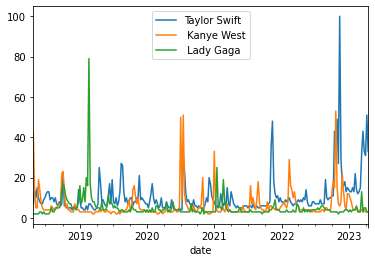

In [26]:
plot = pytrends.interest_over_time()
plot.plot()